# Pattern Recognition Assignment I

# Problem Statement

Heart failure is a critical condition often caused by cardiovascular diseases (CVDs). Early
prediction of heart failure can aid in timely medical intervention and improve patient outcomes.
In this assignment, you will build classifiers to predict whether a patient is at risk of heart failure
based on clinical features. The data set for this task is the Heart Failure Prediction dataset
(918 samples, 11 features, 2 classes) available on Kaggle – it includes various patient attributes
(e.g. age, blood pressure, cholesterol levels, etc.) and a binary label indicating the occurrence
of heart failure. This assignment aims to familiarize you with several classical classification
methods and their performance on a real-world medical dataset. You will implement certain
algorithms from scratch and utilize library implementations for others. Through this process,
you will learn how different classifiers work, how to evaluate them, and how to analyze their
results.

## Data Preparation

### Import dependencies

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Read Dataset

In [104]:
df = pd.read_csv('./dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Seperate the features and target class

In [105]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


### Categorical features encoding with `hot encoding`

- Get the categorical features

In [106]:
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X[cat_features].head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


- **Hot Encoding**

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [108]:
encoder = OneHotEncoder(sparse_output=False)
x_encoded = encoder.fit_transform(X[cat_features])

# Convert to DataFrame
x_encoded_df = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out(cat_features), index=X.index)

# Drop original categorical columns and concatenate encoded data
new_X = pd.concat([X.drop(columns=cat_features), x_encoded_df], axis=1)

In [109]:
new_X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,156,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,98,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,108,1.5,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,122,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Data Visualization

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

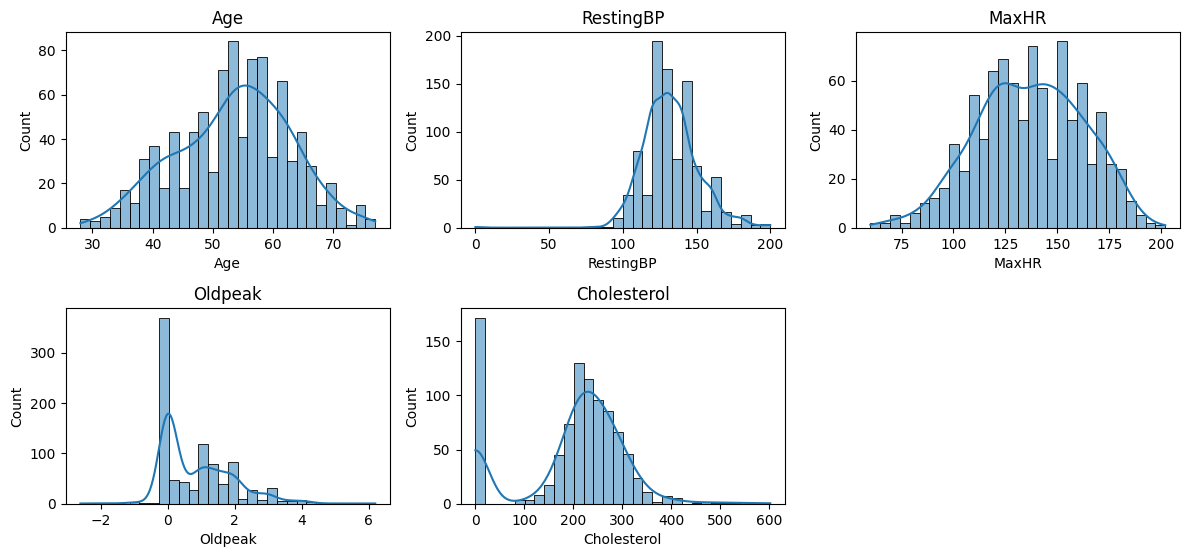

In [111]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(list(set(X.columns) - set(cat_features)), 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_X[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [112]:
final_X = new_X.copy()

### Split the data into Training, Validation and test sets

In [113]:
# Split the data into 70% training
x_train, x_temp, y_train, y_temp = train_test_split(final_X, y, test_size=0.3, stratify=y, random_state=42)

# Split the test 30% into 10% validation and 20% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

In [114]:
x_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
335,62,120,0,134,-0.8,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
368,57,140,0,120,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
111,57,150,255,92,3.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
336,72,160,0,114,1.6,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
479,56,170,0,123,2.5,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [115]:
x_val.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
475,59,178,0,120,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
316,57,105,0,148,0.3,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
798,42,102,265,122,0.6,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
234,54,140,309,140,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
21,44,120,184,142,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [116]:
x_test.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
652,59,160,273,125,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
117,59,130,338,130,1.5,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
800,43,130,315,162,1.9,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
274,45,180,295,180,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
669,45,130,234,175,0.6,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Converting from Pandas Dataframe to Numpy Array

In [117]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

## Decision Tree

Max Depth: 3, Train Accuracy: 0.8473520249221184, Validation Accuracy: 0.8695652173913043, Test Accuracy: 0.8369565217391305
Max Depth: 5, Train Accuracy: 0.881619937694704, Validation Accuracy: 0.8695652173913043, Test Accuracy: 0.8260869565217391
Max Depth: 7, Train Accuracy: 0.9314641744548287, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7717391304347826
Max Depth: 9, Train Accuracy: 0.9517133956386293, Validation Accuracy: 0.8043478260869565, Test Accuracy: 0.7663043478260869
Max Depth: 11, Train Accuracy: 0.9719626168224299, Validation Accuracy: 0.8260869565217391, Test Accuracy: 0.7445652173913043
Max Depth: 13, Train Accuracy: 0.9828660436137072, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.75
Max Depth: 15, Train Accuracy: 0.9844236760124611, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7445652173913043
Max Depth: 17, Train Accuracy: 0.9844236760124611, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7445652173913043
Max Depth: 

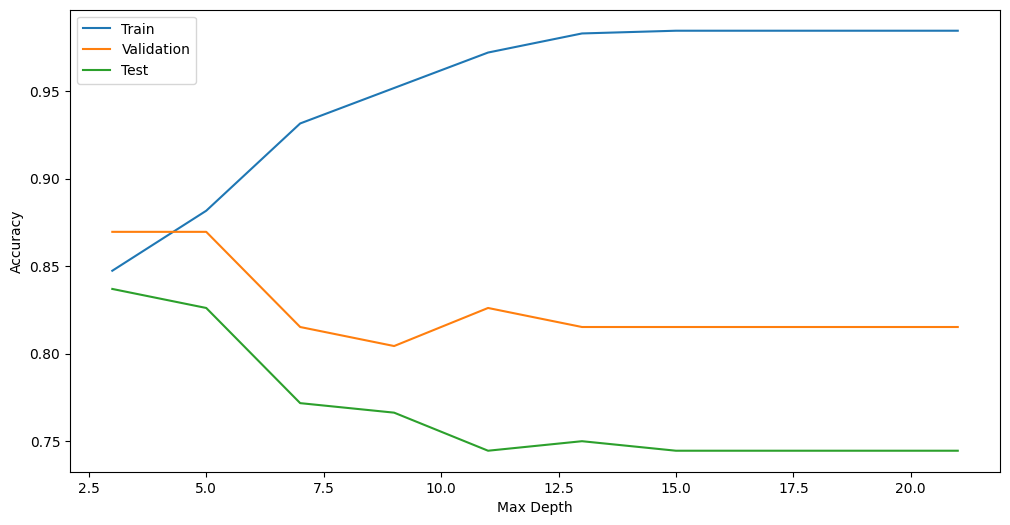

Min Samples Split: 3, Train Accuracy: 0.9735202492211839, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7554347826086957
Min Samples Split: 5, Train Accuracy: 0.9610591900311527, Validation Accuracy: 0.8152173913043478, Test Accuracy: 0.7554347826086957
Min Samples Split: 7, Train Accuracy: 0.9439252336448598, Validation Accuracy: 0.8260869565217391, Test Accuracy: 0.7771739130434783
Min Samples Split: 9, Train Accuracy: 0.9392523364485982, Validation Accuracy: 0.8369565217391305, Test Accuracy: 0.7880434782608695
Min Samples Split: 11, Train Accuracy: 0.9330218068535826, Validation Accuracy: 0.8260869565217391, Test Accuracy: 0.7989130434782609
Min Samples Split: 13, Train Accuracy: 0.9314641744548287, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.7880434782608695
Min Samples Split: 15, Train Accuracy: 0.9174454828660437, Validation Accuracy: 0.8586956521739131, Test Accuracy: 0.7989130434782609
Min Samples Split: 17, Train Accuracy: 0.9080996884735203, Validat

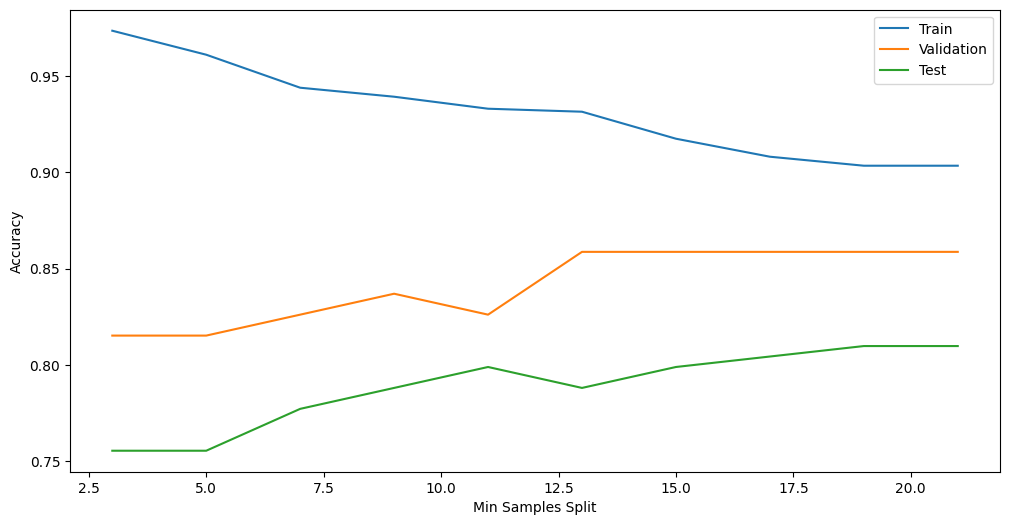

In [118]:
from decision_trees import DecisionTree

max_depth = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_acc = []
val_acc = []
test_acc = []

for depth in max_depth:
    tree = DecisionTree(max_depth=depth)
    tree.fit(x_train, y_train)
    train_acc.append(tree.accuracy(tree.predict(x_train), y_train))
    val_acc.append(tree.accuracy(tree.predict(x_val), y_val))
    test_acc.append(tree.accuracy(tree.predict(x_test), y_test))
    print(f"Max Depth: {depth}, Train Accuracy: {train_acc[-1]}, Validation Accuracy: {val_acc[-1]}, Test Accuracy: {test_acc[-1]}")


plt.figure(figsize=(12, 6))
plt.plot(max_depth, train_acc, label='Train')
plt.plot(max_depth, val_acc, label='Validation')
plt.plot(max_depth, test_acc, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

min_samples_split = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
train_acc2 = []
val_acc2 = []
test_acc2 = []

for samples in min_samples_split:
    tree = DecisionTree(min_samples_split=samples)
    tree.fit(x_train, y_train)
    train_acc2.append(tree.accuracy(tree.predict(x_train), y_train))
    val_acc2.append(tree.accuracy(tree.predict(x_val), y_val))
    test_acc2.append(tree.accuracy(tree.predict(x_test), y_test))
    print(f"Min Samples Split: {samples}, Train Accuracy: {train_acc2[-1]}, Validation Accuracy: {val_acc2[-1]}, Test Accuracy: {test_acc2[-1]}")

plt.figure(figsize=(12, 6))
plt.plot(min_samples_split, train_acc2, label='Train') 
plt.plot(min_samples_split, val_acc2, label='Validation')
plt.plot(min_samples_split, test_acc2, label='Test')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Further Hyperparameter Tuning

Max Depth: 3, Min Samples Split: 2, Val Acc: 0.8696
Max Depth: 3, Min Samples Split: 5, Val Acc: 0.8696
Max Depth: 3, Min Samples Split: 10, Val Acc: 0.8696
Max Depth: 3, Min Samples Split: 15, Val Acc: 0.8696
Max Depth: 3, Min Samples Split: 20, Val Acc: 0.8696
Max Depth: 3, Min Samples Split: 30, Val Acc: 0.8696
Max Depth: 5, Min Samples Split: 2, Val Acc: 0.8696
Max Depth: 5, Min Samples Split: 5, Val Acc: 0.8696
Max Depth: 5, Min Samples Split: 10, Val Acc: 0.8696
Max Depth: 5, Min Samples Split: 15, Val Acc: 0.8696
Max Depth: 5, Min Samples Split: 20, Val Acc: 0.8696
Max Depth: 5, Min Samples Split: 30, Val Acc: 0.8696
Max Depth: 7, Min Samples Split: 2, Val Acc: 0.8152
Max Depth: 7, Min Samples Split: 5, Val Acc: 0.8152
Max Depth: 7, Min Samples Split: 10, Val Acc: 0.8587
Max Depth: 7, Min Samples Split: 15, Val Acc: 0.8587
Max Depth: 7, Min Samples Split: 20, Val Acc: 0.8587
Max Depth: 7, Min Samples Split: 30, Val Acc: 0.8478
Max Depth: 10, Min Samples Split: 2, Val Acc: 0.8152

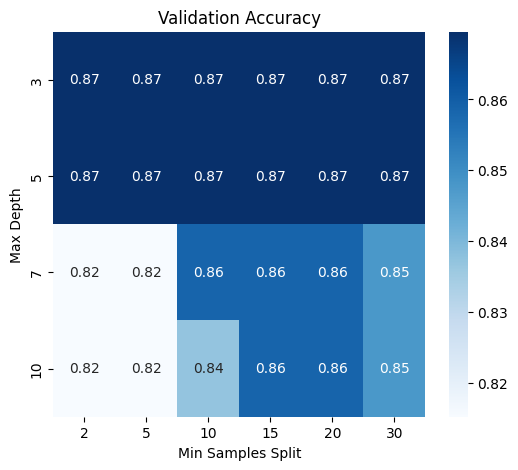

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


max_depth_values = [3, 5, 7, 10]  
min_samples_split_values = [2, 5, 10, 15, 20, 30]

val_acc_matrix = np.zeros((len(max_depth_values), len(min_samples_split_values)))

max_acc = 0.0
dt_best_params = {}
for i, depth in enumerate(max_depth_values):
    for j, samples in enumerate(min_samples_split_values):
        tree = DecisionTree(max_depth=depth, min_samples_split=samples)
        tree.fit(x_train, y_train)
        
        val_acc_matrix[i, j] = tree.accuracy(tree.predict(x_val), y_val)

        if(val_acc_matrix[i, j] > max_acc):
            max_acc = val_acc_matrix[i, j]
            dt_best_params['max_depth'] = depth
            dt_best_params['min_samples_split'] = samples
        print(f"Max Depth: {depth}, Min Samples Split: {samples}, Val Acc: {val_acc_matrix[i, j]:.4f}")

print(f"Best Parameters: {dt_best_params}")
tree = DecisionTree(max_depth=depth, min_samples_split=samples)
tree.fit(x_train, y_train)
decision_tree_y_pred = tree.predict(x_test)
decision_tree_accuracy = tree.accuracy(decision_tree_y_pred, y_test)
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")

def plot_heatmap(matrix, title, x_labels, y_labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, cmap="Blues", xticklabels=x_labels, yticklabels=y_labels)
    plt.xlabel("Min Samples Split")
    plt.ylabel("Max Depth")
    plt.title(title)
    plt.show()

plot_heatmap(val_acc_matrix, "Validation Accuracy", min_samples_split_values, max_depth_values)


### Evaluation of Decision Trees

Training Time: 0.2356 seconds
Prediction Time: 0.0000 seconds
Test Accuracy: 0.842391304347826
F1 Score: 0.8427
Confusion Matrix:
[[70 12]
 [17 85]]


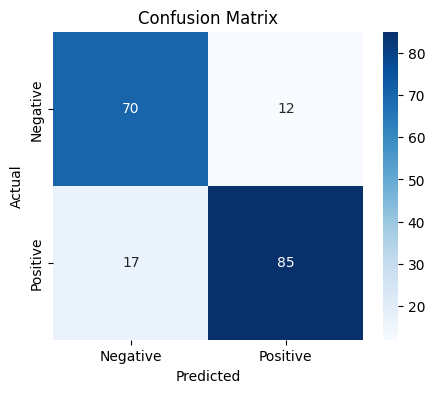

In [120]:
from decision_trees import DecisionTree
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

#  Best parameters
tree = DecisionTree(max_depth=5, min_samples_split=21)
start_time = time.time()
tree.fit(x_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
test_pred = tree.predict(x_test)
prediction_time = time.time() - start_time
test_acc = tree.accuracy(test_pred, y_test)

print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")

print(f"Test Accuracy: {test_acc}")

f1 = f1_score(y_test, test_pred, average='weighted')  
print(f"F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, test_pred)

print("Confusion Matrix:")
print(cm)



plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# print(classification_report(y_test, test_pred))


## Bagging Classifier

In [121]:
from baggingClassifier import BaggingClassifier

In [122]:
n = [10, 20, 30, 50]

best_acc = 0.0
bg_best_params = {}
for n_estimators in n:
    baggingClassifier = BaggingClassifier(n_estimators=n_estimators, max_depth=dt_best_params['max_depth'], min_sample_split=dt_best_params['min_samples_split'])
    
    baggingClassifier.fit(x_train, y_train)
    temp_acc = baggingClassifier.test(x_val, y_val)
    
    if temp_acc > best_acc:
        best_acc = temp_acc
        bg_best_params = {"n_estimators": n_estimators}
    print(f"n_estimators: {n_estimators}, Validation Accuracy: {temp_acc:.4f}")
            

baggingClassifier = BaggingClassifier(n_estimators=bg_best_params['n_estimators'], max_depth=dt_best_params['max_depth'], min_sample_split=dt_best_params['min_samples_split'])

baggingClassifier.fit(x_train, y_train)
y_test_predict = baggingClassifier.predict(x_test)
bagging_acc = baggingClassifier.test(x_test, y_test)


n_estimators: 10, Validation Accuracy: 0.8696
n_estimators: 20, Validation Accuracy: 0.8804
n_estimators: 30, Validation Accuracy: 0.8804
n_estimators: 50, Validation Accuracy: 0.8913


Bagging: Test Accuracy = 0.853
Bagging: F1 Score = 0.863
Bagging: Confusion Matrix:
 [[72 10]
 [17 85]]


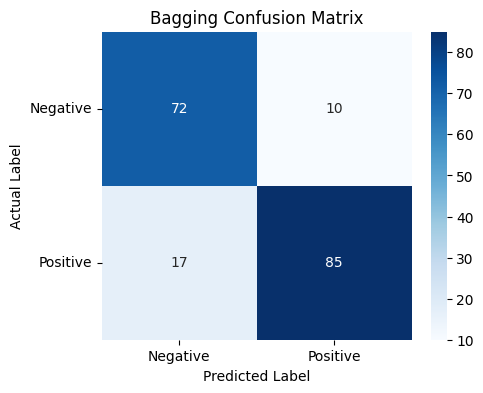

In [123]:
bagging_f1 = f1_score(y_test, y_test_predict)
bagging_cm = confusion_matrix(y_test, y_test_predict)

print(f"Bagging: Test Accuracy = {bagging_acc:.3f}")
print(f"Bagging: F1 Score = {bagging_f1:.3f}")
print(f"Bagging: Confusion Matrix:\n {bagging_cm}")

plt.figure(figsize=(5, 4))
sns.heatmap(bagging_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.yticks(rotation=0) # to not rotate the labels on y scale
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Bagging Confusion Matrix")
plt.show()

## Adaboost Classifier

In [124]:
from AdaBoost import AdaBoost

In [125]:
# using the validation set to decide on the best number of iterations in adaboost (hyperparameter)

best_adaboost_error_rate = float('inf')
best_adaboost_num_iterations = 0
best_adaboost_model = None
validation_accuracies = []
for num_iterations in range(10, 501, 10):
    adaBoost = AdaBoost(num_iterations=num_iterations)
    adaBoost.fit(x_train, y_train)
    y_val_predict = adaBoost.predict(x_val)

    misclassified = np.sum(y_val_predict != y_val)  # Count misclassified samples
    error_rate = misclassified / len(y_val)  # Compute error rate
    validation_accuracies.append(1 - error_rate)

    print(f"num_iterations: {num_iterations}, error_rate: {error_rate}")

    if error_rate < best_adaboost_error_rate:
        best_adaboost_error_rate = error_rate
        best_adaboost_num_iterations = num_iterations
        best_adaboost_model = adaBoost

best_adaboost_accuracy = 1 - best_adaboost_error_rate
print("AdaBoost: Best number of iterations:", best_adaboost_num_iterations)
print(f"AdaBoost: Best error rate = {best_adaboost_error_rate:.3f}")
print(f"AdaBoost: Best accuracy = {best_adaboost_accuracy:.3f}")

num_iterations: 10, error_rate: 0.10869565217391304
num_iterations: 20, error_rate: 0.10869565217391304
num_iterations: 30, error_rate: 0.10869565217391304
num_iterations: 40, error_rate: 0.10869565217391304
num_iterations: 50, error_rate: 0.09782608695652174
num_iterations: 60, error_rate: 0.10869565217391304
num_iterations: 70, error_rate: 0.09782608695652174
num_iterations: 80, error_rate: 0.09782608695652174
num_iterations: 90, error_rate: 0.10869565217391304
num_iterations: 100, error_rate: 0.10869565217391304
num_iterations: 110, error_rate: 0.10869565217391304
num_iterations: 120, error_rate: 0.09782608695652174
num_iterations: 130, error_rate: 0.09782608695652174
num_iterations: 140, error_rate: 0.09782608695652174
num_iterations: 150, error_rate: 0.11956521739130435
num_iterations: 160, error_rate: 0.09782608695652174
num_iterations: 170, error_rate: 0.11956521739130435
num_iterations: 180, error_rate: 0.10869565217391304
num_iterations: 190, error_rate: 0.11956521739130435
nu

AdaBoost: Test Accuracy = 0.864
AdaBoost: F1 Score = 0.873
AdaBoost: Confusion Matrix:
 [[73  9]
 [16 86]]


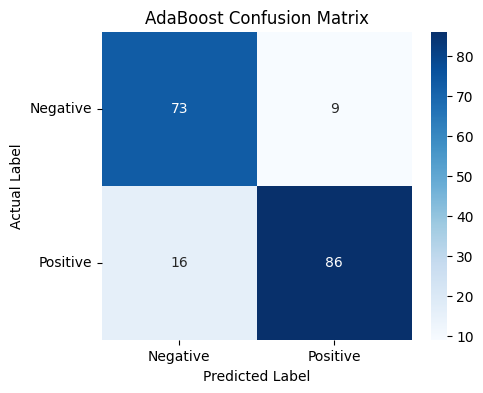

In [126]:
# Evaluation Metrics using test set
from sklearn.metrics import f1_score, confusion_matrix , accuracy_score

# Predict on the test set
y_test_predict = best_adaboost_model.predict(x_test)

adaboost_misclassified = np.sum(y_test_predict != y_test)  # Count misclassified samples
adaboost_error_rate = adaboost_misclassified / len(y_test)  # Compute error rate

adaBoost_accuracy = 1 - adaboost_error_rate
adaboost_f1 = f1_score(y_test, y_test_predict)
adaBoost_cm = confusion_matrix(y_test, y_test_predict)

print(f"AdaBoost: Test Accuracy = {adaBoost_accuracy:.3f}")
print(f"AdaBoost: F1 Score = {adaboost_f1:.3f}")
print(f"AdaBoost: Confusion Matrix:\n {adaBoost_cm}")

plt.figure(figsize=(5, 4))
sns.heatmap(adaBoost_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.yticks(rotation=0) # to not rotate the labels on y scale
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("AdaBoost Confusion Matrix")
plt.show()



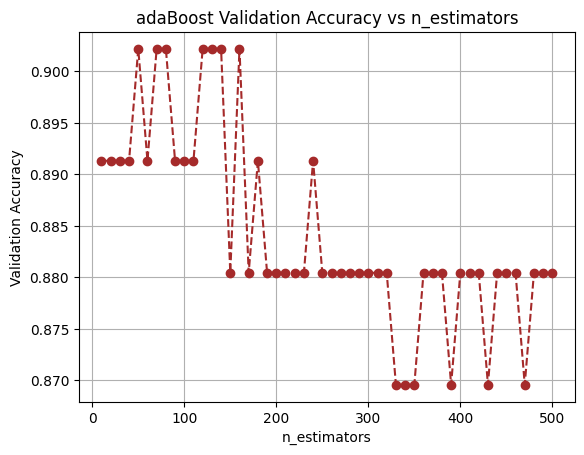

In [127]:
#plotting the validation accuracy at different values of n_estimators
plt.plot(range(10, 501, 10), validation_accuracies, marker='o', linestyle='dashed', color='brown')
plt.xlabel("n_estimators")
plt.ylabel("Validation Accuracy")
plt.title("adaBoost Validation Accuracy vs n_estimators")
plt.grid()
plt.show()

# Bonus

### Normalization

In [128]:
norm_features = list(set(X.columns) - set(cat_features))

print(new_X[norm_features].mean())
normalized_X = new_X.copy()
normalized_X[norm_features] = (new_X[norm_features] - new_X[norm_features].mean()) / new_X[norm_features].std()

Age             53.510893
RestingBP      132.396514
MaxHR          136.809368
Oldpeak          0.887364
Cholesterol    198.799564
dtype: float64


- **Data After Normalization**

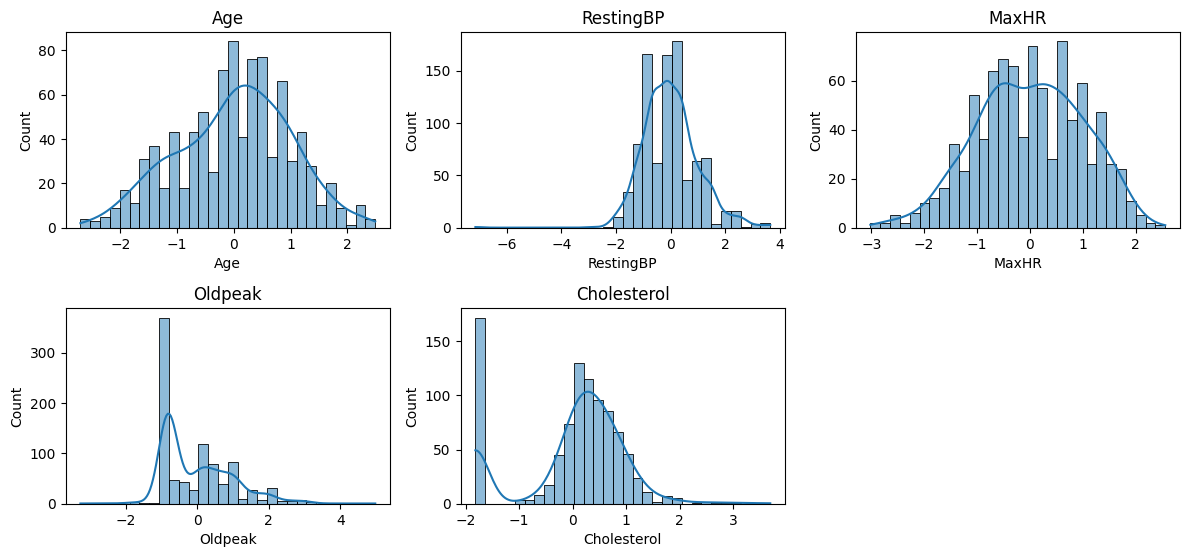

In [129]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(norm_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(normalized_X[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [130]:
# Split the data into 70% training
x_train, x_temp, y_train, y_temp = train_test_split(normalized_X, y, test_size=0.3, stratify=y, random_state=42)

# Split the test 30% into 10% validation and 20% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

In [131]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [132]:
x_train

array([[ 0.8999737 , -0.66956957, -1.81744406, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36989808,  0.41068502, -1.81744406, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36989808,  0.95081232,  0.5137896 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.58423803,  1.49093962,  1.19030447, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.68794345,  0.95081232,  0.54121588, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9022834 ,  0.41068502,  0.23038472, ...,  0.        ,
         0.        ,  1.        ]])

## KNN 

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k = 1
best_score = 0
best_metric = "euclidean"
k_list = [1, 3, 5, 11, 12, 15, 21, 25]
metrics = ["euclidean", "manhattan"]

# Try different distance metrics
for metric in metrics:
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(x_train, y_train)
        val_score = knn.score(x_val, y_val)
        
        if val_score > best_score:
            best_score = val_score
            best_k = k
            best_metric = metric

# Train final model with best k and best metric
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Evaluate on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Best k: {best_k}, Best Metric: {best_metric}, Test Accuracy: {accuracy:.4f}")

Best k: 5, Best Metric: manhattan, Test Accuracy: 0.8750


## Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

Test Accuracy: 0.8750
Test F1 Score: 0.8878


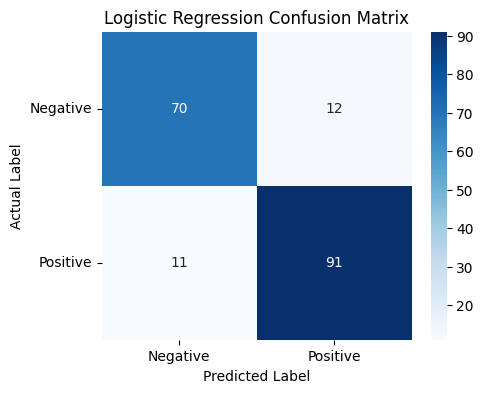

In [135]:
# Using default parameters with 100 max iterations
log_reg_model = LogisticRegression(max_iter=100, random_state=42)
log_reg_model.fit(x_train, y_train)

log_reg_predict = log_reg_model.predict(x_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_f1 = f1_score(y_test, y_pred)
print(f"Test Accuracy: {log_reg_accuracy:.4f}")
print(f"Test F1 Score: {log_reg_f1:.4f}")

# 6. Compute and plot the confusion matrix
log_reg_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.yticks(rotation=0) # to not rotate the labels on y scale

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Feedforward Neural Network

In [136]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = x_train.shape[1]


hidden_neurons = [16, 32, 64]
learning_rates = [0.0005, 0.001, 0.005]
epochs_values = [50, 100, 150]

best_val_acc = 0
best_hyperparams = {}

for neurons in hidden_neurons:
    for lr in learning_rates:
        for epochs in epochs_values:
            # Define the FNN model
            model = keras.Sequential([
                layers.Dense(neurons, activation='relu', input_shape=(input_shape,)),
                layers.Dense(1, activation='sigmoid')
            ])

            # Compile the model
            model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

            # Train the model
            model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val), verbose=0)

            # Evaluate the model
            val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_hyperparams = {'neurons': neurons, 'learning_rate': lr, 'epochs': epochs}
            print(f'Neurons: {neurons}, Learning Rate: {lr}, Epochs: {epochs}, Validation Accuracy: {val_acc:.4f}')

# Train final model with best hyperparameters
model = keras.Sequential([
    layers.Dense(best_hyperparams['neurons'], activation='relu', input_shape=(input_shape,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_hyperparams['learning_rate']),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(x_train, y_train, epochs=best_hyperparams['epochs'], batch_size=32, validation_data=(x_val, y_val))

# Evaluate the final model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Best Hyperparameters: {best_hyperparams}')
print(f'Validation Accuracy: {val_acc:.4f}')



C:\Users\Mustafa Elkaranshawy\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 16, Learning Rate: 0.0005, Epochs: 50, Validation Accuracy: 0.8696
Neurons: 16, Learning Rate: 0.0005, Epochs: 100, Validation Accuracy: 0.8913
Neurons: 16, Learning Rate: 0.0005, Epochs: 150, Validation Accuracy: 0.9022
Neurons: 16, Learning Rate: 0.001, Epochs: 50, Validation Accuracy: 0.9022
Neurons: 16, Learning Rate: 0.001, Epochs: 100, Validation Accuracy: 0.9457
Neurons: 16, Learning Rate: 0.001, Epochs: 150, Validation Accuracy: 0.9239
Neurons: 16, Learning Rate: 0.005, Epochs: 50, Validation Accuracy: 0.9130
Neurons: 16, Learning Rate: 0.005, Epochs: 100, Validation Accuracy: 0.8913
Neurons: 16, Learning Rate: 0.005, Epochs: 150, Validation Accuracy: 0.8913
Neurons: 32, Learning Rate: 0.0005, Epochs: 50, Validation Accuracy: 0.9022
Neurons: 32, Learning Rate: 0.0005, Epochs: 100, Validation Accuracy: 0.8913
Neurons: 32, Learning Rate: 0.0005, Epochs: 150, Validation Accuracy: 0.8587
Neurons: 32, Learning Rate: 0.001, Epochs: 50, Validation Accuracy: 0.8804
Neurons: 32